# Challenge 3

In [1]:
# import libraries here
import pandas as pd

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


#### Import the titanic file. Name your dataset `titanic`.

In [2]:
titanic = pd.read_csv('./titanic.csv',low_memory=False)
titanic.head()

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,U0,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,U0,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,U0,S


#### Explore the titanic dataset using Pandas dtypes

In [4]:
#your code here
titanic.dtypes

PassengerId      int64
Survived       float64
Pclass           int64
Name            object
Gender          object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

#### What are your numerical variables? What are your categorical variables?

*Hint: Use Pandas `select_dtypes`*

In [9]:
# your code here- numerical variable
titanic.select_dtypes('object').columns

Index(['Name', 'Gender', 'Ticket', 'Cabin', 'Embarked'], dtype='object')

In [11]:
#your code here- categorical variable
titanic.select_dtypes(['int64','float64']).columns

Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')

#### Set the plot style to `classic` and the figure size to `(12,6)`

*Hint: To set the style you can use `matplotlib.pyplot` functions or seaborn*

In [13]:
# your code here
plt.style.use('classic')
plt.figure(figsize=(12,6))

<Figure size 960x480 with 0 Axes>

<Figure size 960x480 with 0 Axes>

#### Use the appropriate visulalization to show the distribution of the column `Age`

(array([ 72.,  78., 326., 347., 220., 136.,  75.,  42.,  10.,   3.]),
 array([ 0.17 ,  8.153, 16.136, 24.119, 32.102, 40.085, 48.068, 56.051,
        64.034, 72.017, 80.   ]),
 <a list of 10 Patch objects>)

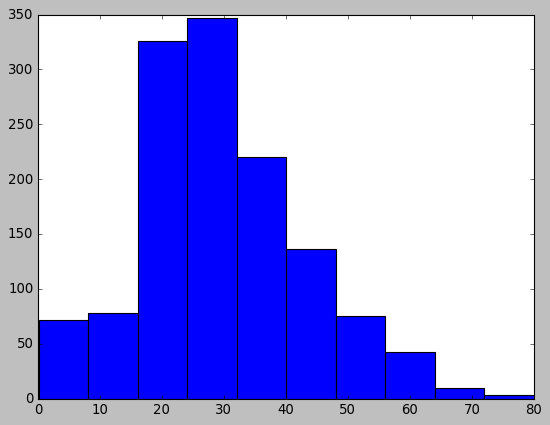

In [16]:
# your code here
plt.hist(titanic.Age)


#### Use subplots to plot the distribution of the `Age` variable with bins equal to `10`, `20` and `50`.

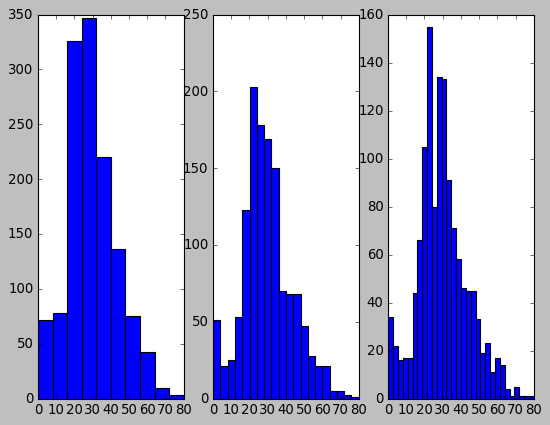

In [20]:
# your code here
f,[ax1,ax2,ax3]=plt.subplots(1,3)
ax1.hist(titanic.Age,bins=10)
ax2.hist(titanic.Age,bins=20)
ax3.hist(titanic.Age,bins=30);


#### Whether the bin size affects your plot? Why?

In [2]:
#your comment here
#Al aumentar la variable bin los histogramas cada vez tienen más definición y pierden generalidad.


#### Use seaborn to show the distribution of the column `Age`

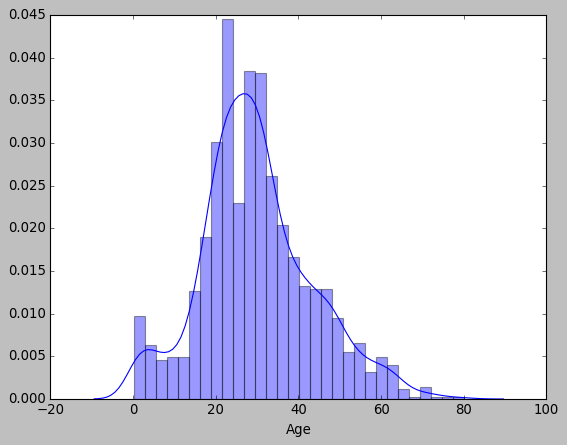

In [21]:
# your code here
ax = sns.distplot(titanic.Age)

#### Use the appropriate plot to visualize the column `Gender`. There are 2 ways of doing it. Do it both ways.

*Hint: Use matplotlib and seaborn*

Gender
female    466
male      843
Name: Gender, dtype: int64


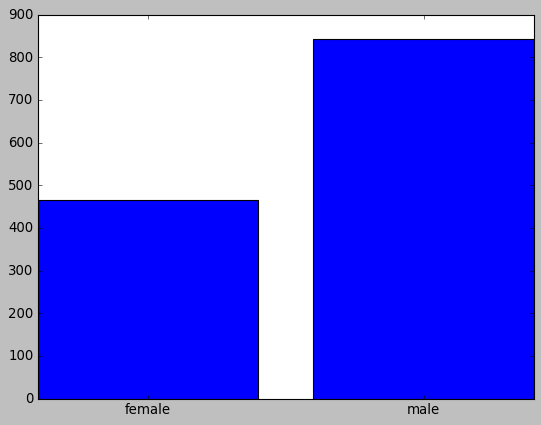

In [29]:
# your code here- 1st way
gender=titanic.groupby(by='Gender')['Gender'].count()
print(gender)
plt.bar(height=gender.values,x=gender.index);


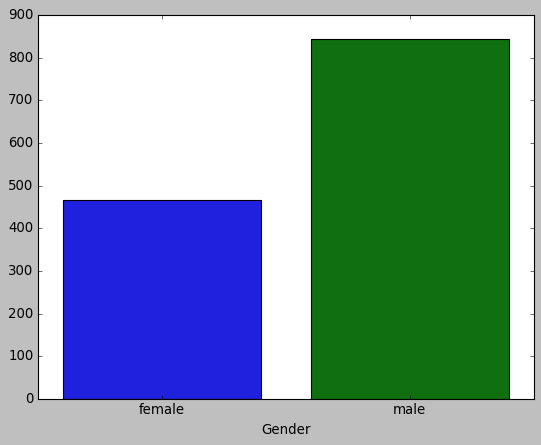

In [31]:
# your code here- 2nd way
sns.barplot(x=gender.index, y=gender.values)

#### Use the appropriate plot to visualize the column `Pclass` 


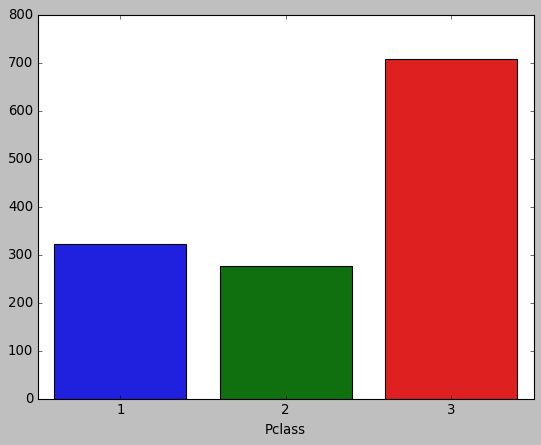

In [36]:
# your code here
pclass=titanic.groupby(by='Pclass')['Pclass'].count()
sns.barplot(x=pclass.index, y=pclass.values)

#### We would like to have in one single plot the summary statistics of the feature `Age`. Choose the appropriate plot to show below.

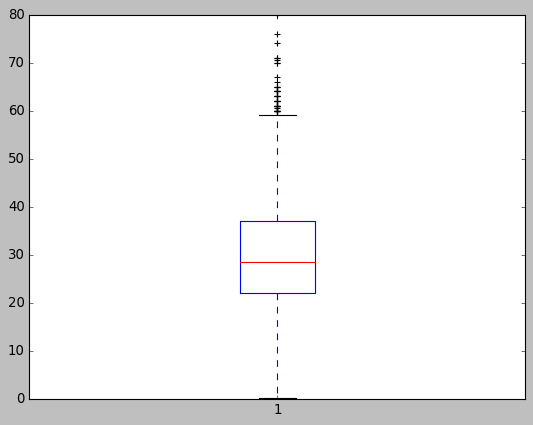

In [38]:
# your code here
plt.boxplot(titanic.Age);

#### What does the previous plot tell you about the feature `Age`? Comment.

In [ ]:
# your comment here
#La edad media está en torno a 25 años; los datos están homogeneamente distribuidos en el rango intercuantílico;
#hay outliers en la parte derecha lo que nos inidica que hay un porcentaje no despreciable de personas de más de 60 años.


#### Now in addition to the summary statistics, we also want to visualize the distribution of `Age`. Choose the appropriate plot to sow below.

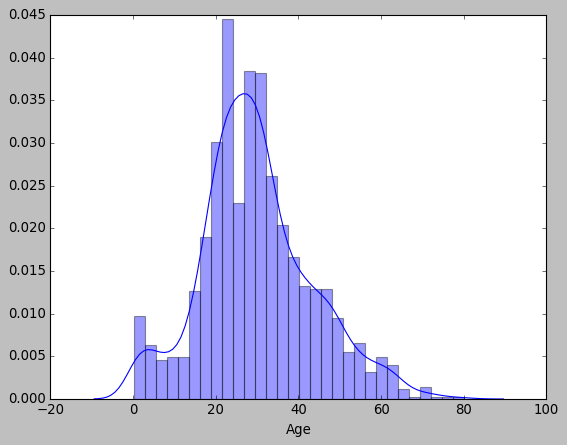

In [39]:
#your code here
ax = sns.distplot(titanic.Age)

#### What additional information in the previous plot provide you about the feature `Age`? Comment.

In [ ]:
#your comment here


#### We suspect that there is a linear relationship between `Fare` and `Age`. Use the appropriate plot to show the relationship between these 2 features. There are 2 ways, please do it both ways.

*Hint: One of the ways involves using Seaborn*

           Age      Fare
Age   1.000000  0.171355
Fare  0.171355  1.000000


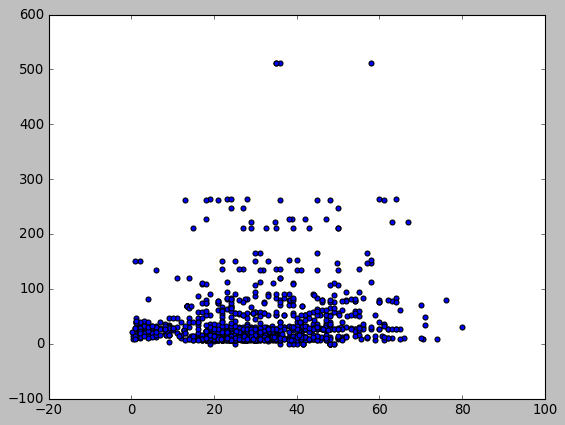

In [47]:
#your code-1st way
y=titanic.Fare
x=titanic.Age

plt.scatter(x,y)
corr=titanic[['Age','Fare']].corr()
print(corr)

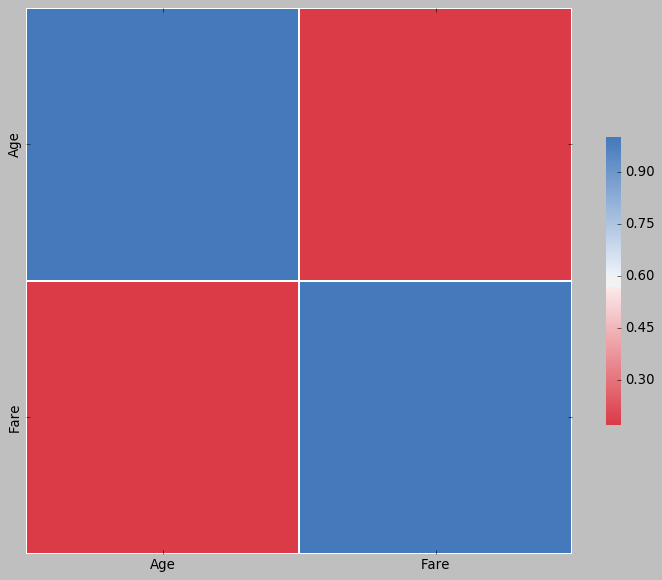

In [51]:
# your code-2nd way
cmap = sns.diverging_palette(10, 250, as_cmap=True)
f, ax = plt.subplots(figsize=(11, 9))
sns.heatmap(corr, cmap=cmap, 
        square=True,
        linewidths=.5, cbar_kws={"shrink": .5}, ax=ax)


#### Using Seaborn plot the correlation matrix of various features.

*Hint: search how to use `heatmap`*

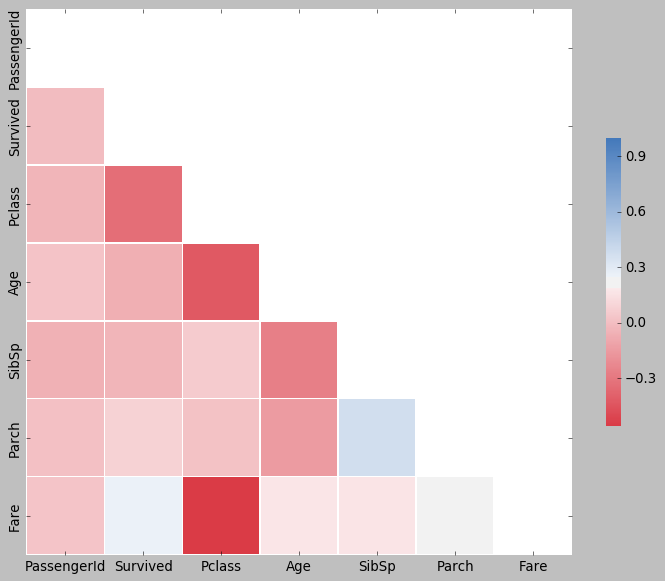

In [54]:
#your code here
corr=titanic.corr()

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

cmap = sns.diverging_palette(10, 250, as_cmap=True)
f, ax = plt.subplots(figsize=(11, 9))
sns.heatmap(corr, cmap=cmap,mask=mask,
        square=True,
        linewidths=.5, cbar_kws={"shrink": .5}, ax=ax)

#### According to the previous plot, what are the most correlated feature? Comment.

In [ ]:
#your comment here
#Survived y Dare
#SibSp y Parch
#Parch y Fare


#### Use the appropriate plot to display the summary statistics of the `Age` in function of the `Pclass`.

*Hint: use boxplot to display summary statistics of `Age` in relation to each of the discrete values of `Pclass`*

Pclass
1    323
2    277
3    709
Name: Age, dtype: int64


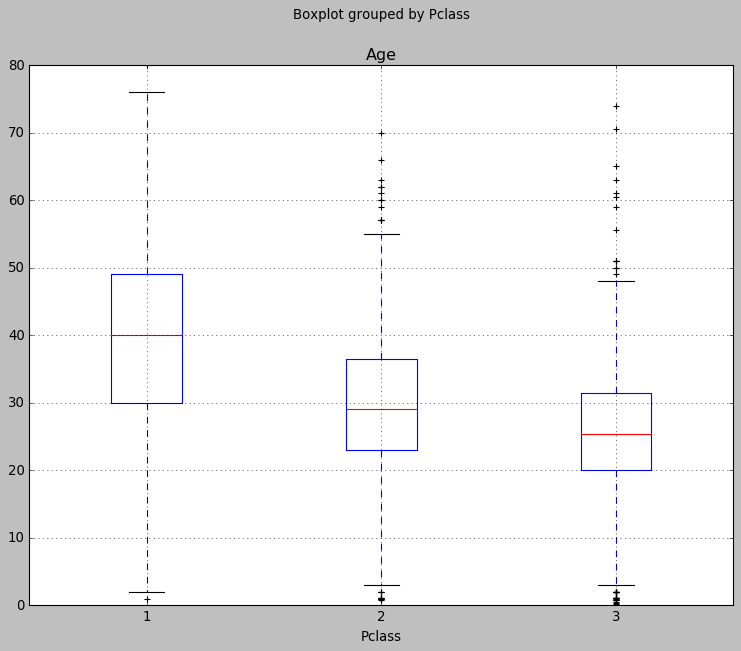

In [78]:
#your code here

print(age_group)
f, ax = plt.subplots(figsize=(11, 9))
titanic.boxplot(column=['Age'], by='Pclass', ax=ax)

#### Use the appropriate plot to display the distributions of  `Age` in relation to  `Gender`.

*Hint: use Facetgrid to display the distribution of `Age` for each categorical value of `Gender`*

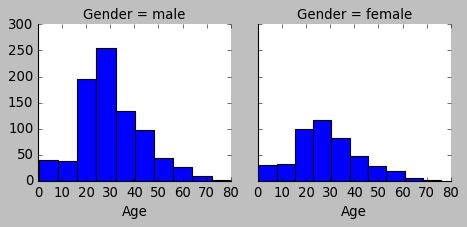

In [79]:
#your code here
g = sns.FacetGrid(data=titanic,col='Gender')
g.map(plt.hist,'Age')